In [5]:
import matplotlib.pyplot as plt
import random
import math
from matplotlib.collections import LineCollection

**2.1.** (уровень сложности: средний)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

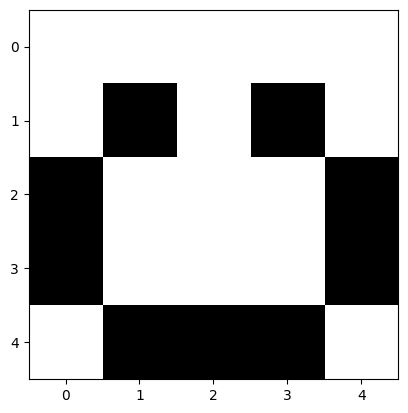

In [45]:
def generate_sprite() -> list[list[int]]:
    image = [[0 for j in range(5)] for i in range(5)]
    for i in range(5):
        for j in range(5):
            if j <= 2:
                image[i][j] = random.choice([0, 255])
            else:
                image[i][j] = image[i][4 - j]
    return image

plt.imshow(generate_sprite(), cmap='gray', vmin=0, vmax=255)

**2.2.** (уровень сложности: средний)

Создайте генератор карт спрайтов. 

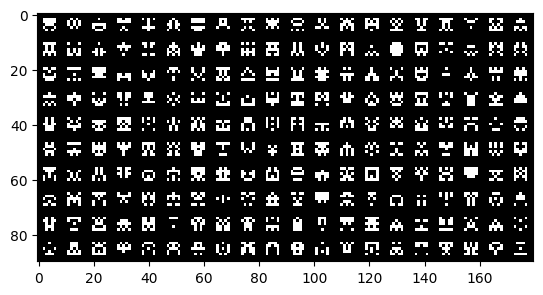

In [46]:
n = 10
m = 20
padding = 2
gap = 4

def get_full_size(val: int) -> int:
    return val * 5 + (val - 1) * gap + 2 * padding


def create_map() -> list[list[int]]:
    return [[0 for j in range(get_full_size(m))] for i in range(get_full_size(n))]
    
    
def place_sprite(sprite: list[list[int]], sprite_map: list[list[int]], x: int, y: int) -> list[list[int]]:
    for i in range(x, x + 5):
        for j in range(y, y + 5):
            sprite_map[i][j] = sprite[i - x][j - y]
            
    return sprite_map


def generate_sprite_map() -> list[list[int]]:
    sprite_map = create_map()
    for i in range(n):
        for j in range(m):
            sprite_map = place_sprite(generate_sprite(), sprite_map, i * 5 + i * gap + padding, j * 5 + padding + j * gap)
            
    return sprite_map


plt.imshow(generate_sprite_map(), cmap='gray', vmin=0, vmax=255, interpolation='none')

**2.3.** (уровень сложности: высокий)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

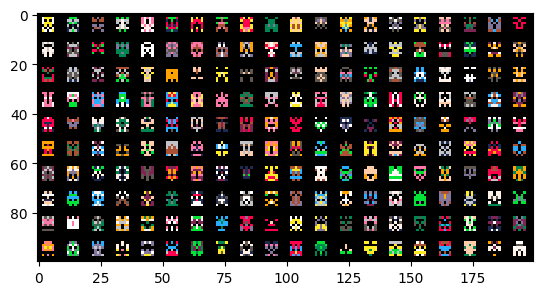

In [3]:
width = 6
height = 6
count_x = 10
count_y = 20
padding = 2
gap = 4

palette = [[0x0, 0x0, 0x0], [0xff, 0xff, 0xff], [0x1d, 0x2b, 0x53], [0x7e, 0x25, 0x53], [0x0, 0x87, 0x51],
           [0xab, 0x52, 0x36], [0x5f, 0x57, 0x4f], [0xc2, 0xc3, 0xc7], [0xff, 0xf1, 0xe8], [0xff, 0x00, 0x4d],
           [0xff, 0xa3, 0x00], [0xff, 0xec, 0x27], [0x00, 0xe4, 0x36], [0x29, 0xad, 0xff], [0x83, 0x76, 0x9c],
           [0xff, 0x77, 0xa8], [0xff, 0xcc, 0xaa]]

def generate_sprite() -> list[list[(int, int, int)]]:
    image = [[(0, 0, 0) for j in range(height)] for i in range(width)]
    palette_for_sprite = [[0x0, 0x0, 0x0]] + [random.choice(palette) for _ in range(3)]
    for i in range(width):
        for j in range(height):
            if j <= height // 2 - 1:
                image[i][j] = random.choice(palette_for_sprite)
            else:
                image[i][j] = image[i][4 - j]
    return image


def get_full_size(val: int, coeff: int) -> int:
    return val * coeff + (val - 1) * gap + 2 * padding


def create_map() -> list[list[(int, int, int)]]:
    return [[(0, 0, 0) for j in range(get_full_size(count_y, height))] for i in range(get_full_size(count_x, width))]
    
    
def place_sprite(sprite: list[list[int]], sprite_map: list[list[int]], x: int, y: int) -> list[list[int]]:
    for i in range(x, x + width):
        for j in range(y, y + height):
            sprite_map[i][j] = sprite[i - x][j - y]
            
    return sprite_map


def generate_sprite_map() -> list[list[int]]:
    sprite_map = create_map()
    for i in range(count_x):
        for j in range(count_y):
            sprite_map = place_sprite(generate_sprite(), sprite_map, i * width + i * gap + padding, j * height + padding + j * gap)
            
    return sprite_map


plt.imshow(generate_sprite_map(), interpolation='none')

**2.4.** (уровень сложности: высокий)

Слышали ли вы об играх с процедурно сгенерированными вселенными? Оказывается, у современной Elite Dangerous есть далекий предок – игра Elite 1984 года. В Elite была впечатляющая по тем временам 3d графика и целых 8 галактик для исследования, каждая из которых содержала 256 солнечных систем. Удивительно, но все это работало на 8-битном компьютере, а код игры составлял микроскопические 32 Кбайт.

Изобразите легендарную первую галактику из игры Elite. Для этого потребуется портировать алгоритм процедурной генерации, приведенный далее на C/C++. Обратите внимание, этот код написан в низкоуровневом стиле, поскольку был получен из оригинальной игры, которая, в свою очередь, была написана на языке ассемблера. Вам необходимо при портировании следовать хорошему стилю написания программ на Питоне.

Каждая галактика в игре генерируется на основе всего трех 16-битных чисел w0, w1 и w2. Для первой галактики это 0x5A4A, 0x0248 и 0xB753. Имена звезд генерируются с помощью массива слогов.

```cpp
char pairs[] = "..LEXEGEZACEBISO"
"USESARMAINDIREA."
"ERATENBERALAVETI"
"EDORQUANTEISRION"; /* Dots should be nullprint characters */

typedef struct
{
 uint x;
 uint y; /* One byte unsigned */
 uint economy; /* These two are actually only 0-7 */
 uint govtype;
 uint techlev; /* 0-16 i think */
 uint population; /* One byte */
 uint productivity; /* Two byte */
 uint radius; /* Two byte (not used by game at all) */
 fastseedtype goatsoupseed;
 char name[12];
} plansys;

void tweakseed(seedtype *s)
{
 uint16 temp;
 temp = ((*s).w0) + ((*s).w1) + ((*s).w2); /* 2 byte aritmetic */
 (*s).w0 = (*s).w1;
 (*s).w1 = (*s).w2;
 (*s).w2 = temp;
}

/**-Generate system info from seed **/

plansys makesystem(seedtype *s)
{
 plansys thissys;
 uint pair1, pair2, pair3, pair4;
 uint16 longnameflag = ((*s).w0) & 64;

 thissys.x = (((*s).w1) >> 8);
 thissys.y = (((*s).w0) >> 8);

 thissys.govtype = ((((*s).w1) >> 3) & 7); /* bits 3,4 &5 of w1 */

 thissys.economy = ((((*s).w0) >> 8) & 7); /* bits 8,9 &A of w0 */
 if (thissys.govtype <= 1)
 {
 thissys.economy = ((thissys.economy) | 2);
 }

 thissys.techlev = ((((*s).w1) >> 8) & 3) + ((thissys.economy) ^ 7);
 thissys.techlev += ((thissys.govtype) >> 1);
 if (((thissys.govtype) & 1) == 1) thissys.techlev += 1;
 /* C simulation of 6502's LSR then ADC */

 thissys.population = 4 * (thissys.techlev) + (thissys.economy);
 thissys.population += (thissys.govtype) + 1;

 thissys.productivity = (((thissys.economy) ^ 7) + 3)*((thissys.govtype) + 4);
 thissys.productivity *= (thissys.population) * 8;

 thissys.radius = 256 * (((((*s).w2) >> 8) & 15) + 11) + thissys.x;

 thissys.goatsoupseed.a = (*s).w1 & 0xFF;;
 thissys.goatsoupseed.b = (*s).w1 >> 8;
 thissys.goatsoupseed.c = (*s).w2 & 0xFF;
 thissys.goatsoupseed.d = (*s).w2 >> 8;

 pair1 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair2 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair3 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair4 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 /* Always four iterations of random number */

 (thissys.name)[0] = pairs[pair1];
 (thissys.name)[1] = pairs[pair1 + 1];
 (thissys.name)[2] = pairs[pair2];
 (thissys.name)[3] = pairs[pair2 + 1];
 (thissys.name)[4] = pairs[pair3];
 (thissys.name)[5] = pairs[pair3 + 1];

 if (longnameflag) /* bit 6 of ORIGINAL w0 flags a four-pair name */
 {
 (thissys.name)[6] = pairs[pair4];
 (thissys.name)[7] = pairs[pair4 + 1];
 (thissys.name)[8] = 0;
 }
 else (thissys.name)[6] = 0;
 stripout(thissys.name, '.');

 return thissys;
}
```

In [9]:
import random

pairs = "..LEXEGEZACEBISO" \
        "USESARMAINDIREA." \
        "ERATENBERALAVETI" \
        "EDORQUANTEISRION"  # Dots should be nullprint characters

class SeedType:
    def __init__(self, w0, w1, w2):
        self.w0 = w0
        self.w1 = w1
        self.w2 = w2

class PlanSys:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.economy = 0
        self.govtype = 0
        self.techlev = 0
        self.population = 0
        self.productivity = 0
        self.radius = 0
        self.goatsoupseed = SeedType(0, 0, 0)
        self.name = [0] * 12

def tweak_seed(s):
    temp = s.w0 + s.w1 + s.w2
    s.w0, s.w1, s.w2 = s.w1, s.w2, temp

def make_system(s):
    this_sys = PlanSys()
    long_name_flag = s.w0 & 64

    this_sys.x = s.w1 >> 8
    this_sys.y = s.w0 >> 8

    this_sys.govtype = (s.w1 >> 3) & 7

    this_sys.economy = (s.w0 >> 8) & 7
    if this_sys.govtype <= 1:
        this_sys.economy |= 2

    this_sys.techlev = (s.w1 >> 8) & 3 + (this_sys.economy ^ 7)
    this_sys.techlev += this_sys.govtype >> 1
    if this_sys.govtype & 1 == 1:
        this_sys.techlev += 1

    this_sys.population = 4 * this_sys.techlev + this_sys.economy
    this_sys.population += this_sys.govtype + 1

    this_sys.productivity = (this_sys.economy ^ 7 + 3) * (this_sys.govtype + 4)
    this_sys.productivity *= this_sys.population * 8

    this_sys.radius = 256 * ((s.w2 >> 8) & 15 + 11) + this_sys.x

    this_sys.goatsoupseed.a = s.w1 & 0xFF
    this_sys.goatsoupseed.b = s.w1 >> 8
    this_sys.goatsoupseed.c = s.w2 & 0xFF
    this_sys.goatsoupseed.d = s.w2 >> 8

    pair1 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair2 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair3 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair4 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)

    this_sys.name[0] = pairs[pair1]
    this_sys.name[1] = pairs[pair1 + 1]
    this_sys.name[2] = pairs[pair2]
    this_sys.name[3] = pairs[pair2 + 1]
    this_sys.name[4] = pairs[pair3]
    this_sys.name[5] = pairs[pair3 + 1]

    if long_name_flag:
        this_sys.name[6] = pairs[pair4]
        this_sys.name[7] = pairs[pair4 + 1]
        this_sys.name[8] = '\0'
    else:
        this_sys.name[6] = '\0'

    return ''.join(str(char) for char in this_sys.name if char != '.')

# Example usage:
random.seed(42) # Set a seed for reproducibility
seed_type_instance = SeedType(0x5A4A, 0x0248, 0xB753)
system_info = make_system(seed_type_instance)
system_info1 = make_system(seed_type_instance)
system_info2 = make_system(seed_type_instance)
system_info3 = make_system(seed_type_instance)
print(system_info, system_info1, system_info2, system_info3)

TIBEDIED 000 QUBE 00000 LELEER 00000 BIARGE 00000


**2.5.** (уровень сложности: высокий)

Создайте генератор растений с помощью алгоритма освоения пространства (space colonization algorithm). Этот алгоритм описан в статье 2007 года и позволяет моделировать различные природные явления: корни и ветви деревьев, сети рек и дорог и так далее.

Основная идея алгоритма состоит в том, чтобы разместить в некоторой области случайным образом точки притяжения. К этим точкам на каждой итерации тянутся узлы моделируемого растения или дерева. В процессе создаются ветки, а точки поглощаются.

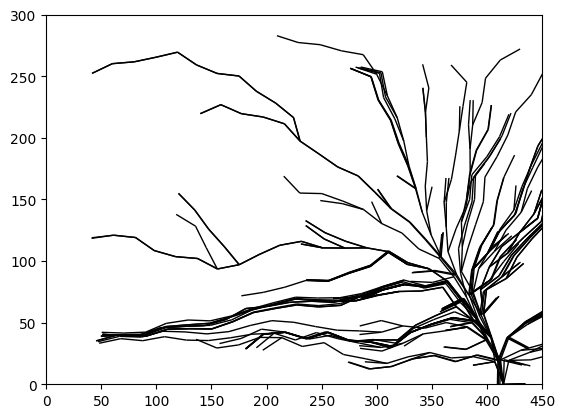

In [102]:
width = 450
height = 300
N = 1000
n_of_tree_nodes = 1
d_k = 50
d_i = 100
D = 20
steps = 35

Point = tuple[int, int]

def generate_points(n: int) -> list[Point]:
    return [((width / n + 1) * i + 1, random.randint(0, height)) for i in range(n)]


def generate_starting_points(n: int) -> list[Point]:
    return [(random.randint(0, width), 0) for _ in range(n)]


def get_distance(point1: Point, point2: Point) -> float:
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1])**2)


def get_nearest_attraction_points(tree_node: Point, attraction_points: list[Point]) -> list[Point]:
    return list(filter(lambda p: get_distance(p, tree_node) <= d_i, attraction_points))


def calculate_v_streak(v: Point, S: list[Point]) -> Point:
    n_vector = [0, 0]
    
    for s in S:
        s_minus_v = (s[0] - v[0], s[1] - v[1])
        modulus_s_minus_v = math.sqrt(s_minus_v[0] ** 2 + s_minus_v[1] ** 2)
        n_vector[0] += s_minus_v[0] / modulus_s_minus_v
        n_vector[1] += s_minus_v[1] / modulus_s_minus_v
        
    n_norma = math.sqrt(n_vector[0] ** 2 + n_vector[1] ** 2)
    n = (n_vector[0] / n_norma, n_vector[1] / n_norma)
    nD = (n[0] * D, n[1] * D)
    v_streak = (v[0] + nD[0], v[1] + nD[1])
    return v_streak


def main():
    attraction_points = generate_points(N)
    tree_nodes = generate_starting_points(n_of_tree_nodes)
    segments = []
    
    for i in range(steps):
        for tree_node in tree_nodes:
            attraction_points = list(filter(lambda p: get_distance(p, tree_node) >= d_k, attraction_points))
            
        new_tree_nodes = []
        for tree_node in tree_nodes:
            S = get_nearest_attraction_points(tree_node, attraction_points)
            if len(S) > 0:
                v_streak = calculate_v_streak(tree_node, S)
                new_tree_nodes.append(v_streak)
                segments.append((tree_node, v_streak))
        tree_nodes += new_tree_nodes
        global d_i
        d_i -= (d_i / steps * 0.75)
    
    line_segments = LineCollection(segments, linewidth=1, color=[0x0, 0x0, 0x0])
    fig, ax = plt.subplots()
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.add_collection(line_segments)
    plt.show()
    

main()

Растения могут расти совместно:

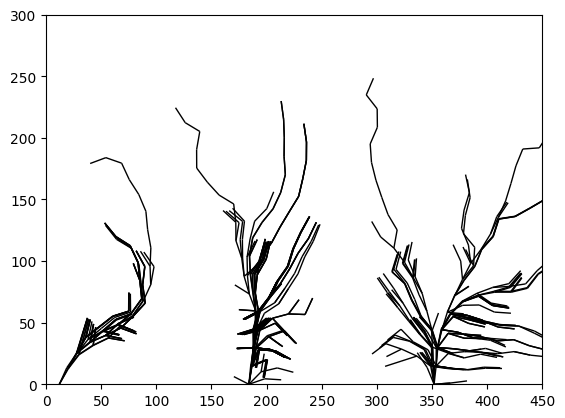

In [107]:
width = 450
height = 300
N = 2000
n_of_tree_nodes = 3
d_k = 50
d_i = 100
D = 20
steps = 20

Point = tuple[int, int]

def generate_points(n: int) -> list[Point]:
    return [((width / n + 1) * i + 1, random.randint(0, height)) for i in range(n)]


def generate_starting_points(n: int) -> list[Point]:
    return [(random.randint(0, width), 0) for _ in range(n)]


def get_distance(point1: Point, point2: Point) -> float:
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1])**2)


def get_nearest_attraction_points(tree_node: Point, attraction_points: list[Point]) -> list[Point]:
    return list(filter(lambda p: get_distance(p, tree_node) <= d_i, attraction_points))


def calculate_v_streak(v: Point, S: list[Point]) -> Point:
    n_vector = [0, 0]
    
    for s in S:
        s_minus_v = (s[0] - v[0], s[1] - v[1])
        modulus_s_minus_v = math.sqrt(s_minus_v[0] ** 2 + s_minus_v[1] ** 2)
        n_vector[0] += s_minus_v[0] / modulus_s_minus_v
        n_vector[1] += s_minus_v[1] / modulus_s_minus_v
        
    n_norma = math.sqrt(n_vector[0] ** 2 + n_vector[1] ** 2)
    n = (n_vector[0] / n_norma, n_vector[1] / n_norma)
    nD = (n[0] * D, n[1] * D)
    v_streak = (v[0] + nD[0], v[1] + nD[1])
    return v_streak


def main():
    attraction_points = generate_points(N)
    tree_nodes = generate_starting_points(n_of_tree_nodes)
    segments = []
    
    for i in range(steps):
        for tree_node in tree_nodes:
            attraction_points = list(filter(lambda p: get_distance(p, tree_node) >= d_k, attraction_points))
            
        new_tree_nodes = []
        for tree_node in tree_nodes:
            S = get_nearest_attraction_points(tree_node, attraction_points)
            if len(S) > 0:
                v_streak = calculate_v_streak(tree_node, S)
                new_tree_nodes.append(v_streak)
                segments.append((tree_node, v_streak))
        tree_nodes += new_tree_nodes
        global d_i
        d_i -= (d_i / steps * 0.75)
    
    line_segments = LineCollection(segments, linewidth=1, color=[0x0, 0x0, 0x0])
    fig, ax = plt.subplots()
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.add_collection(line_segments)
    plt.show()
    

main()

**2.6.** (уровень сложности: высокий)

Создайте генератор деревьев на основе алгоритма освоения пространства. Деревья должны иметь ствол и листья.

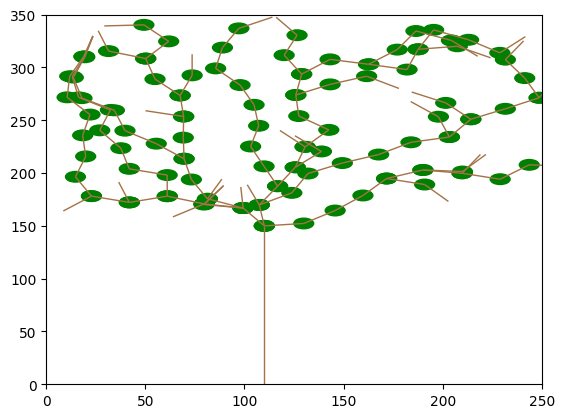

In [126]:
width = 250
height = 350
N = 1000
n_of_tree_nodes = 1
d_k = 20
d_i = 40
D = 20
steps = 40

Point = tuple[int, int]

def generate_points(n: int) -> list[Point]:
    return [((width / n + 1) * i + 1, random.randint(150, height)) for i in range(n)]


def generate_starting_points(n: int) -> list[Point]:
    return [(random.randint(0, width), 0) for _ in range(n)]


def get_distance(point1: Point, point2: Point) -> float:
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1])**2)


def get_nearest_attraction_points(tree_node: Point, attraction_points: list[Point]) -> list[Point]:
    return list(filter(lambda p: get_distance(p, tree_node) <= d_i, attraction_points))


def calculate_v_streak(v: Point, S: list[Point]) -> Point:
    n_vector = [0, 0]
    
    for s in S:
        s_minus_v = (s[0] - v[0], s[1] - v[1])
        modulus_s_minus_v = math.sqrt(s_minus_v[0] ** 2 + s_minus_v[1] ** 2)
        n_vector[0] += s_minus_v[0] / modulus_s_minus_v
        n_vector[1] += s_minus_v[1] / modulus_s_minus_v
        
    n_norma = math.sqrt(n_vector[0] ** 2 + n_vector[1] ** 2)
    n = (n_vector[0] / n_norma, n_vector[1] / n_norma)
    nD = (n[0] * D, n[1] * D)
    v_streak = (v[0] + nD[0], v[1] + nD[1])
    return v_streak


def main():
    attraction_points = generate_points(N)
    tree_nodes = [(110, 150)]
    segments = [[(110, 0), (110, 150)]]
    
    fig, ax = plt.subplots()
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    
    for i in range(steps):
        for tree_node in tree_nodes:
            attraction_points = list(filter(lambda p: get_distance(p, tree_node) >= d_k, attraction_points))
            
        new_tree_nodes = []
        for tree_node in tree_nodes:
            S = get_nearest_attraction_points(tree_node, attraction_points)
            if len(S) > 0:
                v_streak = calculate_v_streak(tree_node, S)
                new_tree_nodes.append(v_streak)
                segments.append((tree_node, v_streak))
                circle1 = plt.Circle(tree_node, 5, color='g')
                ax.add_patch(circle1)
        tree_nodes += new_tree_nodes
        global d_i
        d_i -= (d_i / steps * 0.75)
    
    line_segments = LineCollection(segments, linewidth=1, color=[0.64, 0.45, 0.28])
    ax.add_collection(line_segments)
    plt.show()
    

main()